In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

In [84]:
text = open('.\data\wc1.alice.txt').read()

In [85]:
import numpy as np
from PIL import Image
from wordcloud import STOPWORDS

alice_mask = np.array(Image.open(".\data\wc2.alice_mask.png"))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [86]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

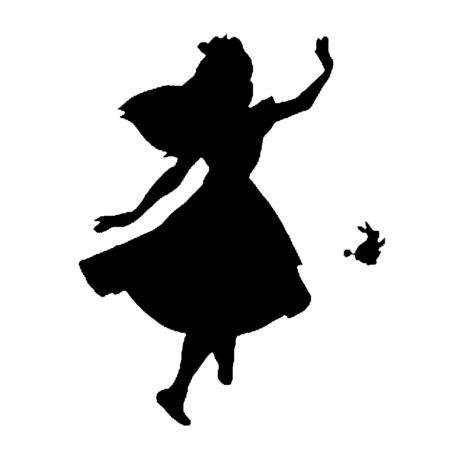

In [87]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [88]:
#stopwords 제거
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [89]:
wc = WordCloud(background_color="White", max_words=2000, mask=alice_mask,
              stopwords=stopwords)
wc = wc.generate(text)

#wc.to_file(path.join(d, "alice.png"))
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.25956284153005466,
 'know': 0.2459016393442623,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'now': 0.16393442622950818,
 'went': 0.15846994535519127,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'well': 0.14754098360655737,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'head': 0.13114754098360656,
 'What': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11

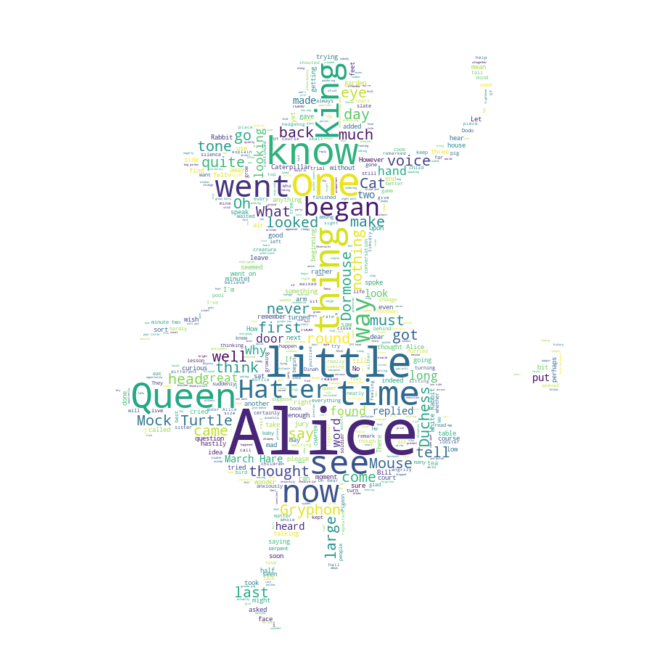

In [90]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [91]:
text = open('data/wc3.a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('.\data\wc4. stormtrooper_mask.png'))
#alice_mask = np.array(Image.open(".\data\wc2.alice_mask.png"))

In [92]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [93]:
# Stopwords 제거
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [94]:
wc = WordCloud(max_words=1000, mask=mask, 
               margin=10, random_state=156).generate(text)
default_colors = wc.to_array()

In [95]:
# HSL: 색조(hue), 포화(saturation), 밝기(lightness)
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

In [96]:
s = 'hsl(0, 0%%, %d%%)' % random.randint(60,100)
s

'hsl(0, 0%, 84%)'

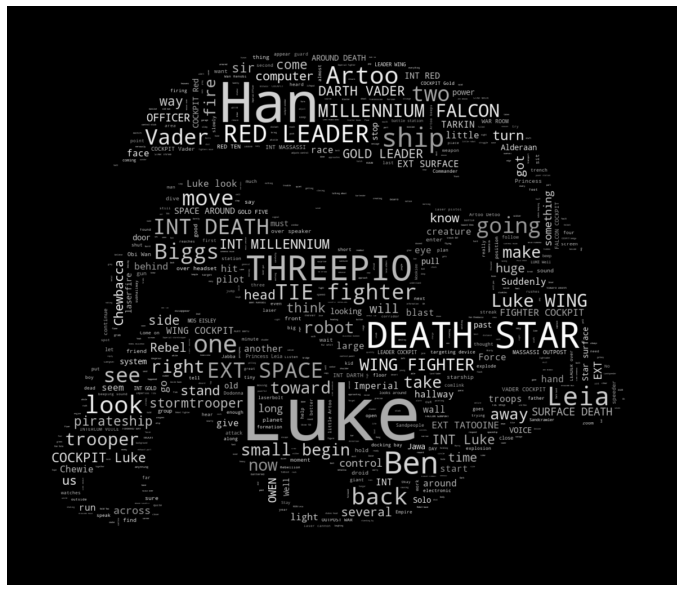

In [97]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=10),
          interpolation='bilinear')
plt.axis('off')
plt.show()

In [98]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [99]:
html_ = 'https://kin.naver.com/search/list.nhn?'
html = html_ + 'query={key_word}&page={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))
soup = BeautifulSoup(response, "html.parser")
dl_ = soup.find_all('dl')
dl_

[<dl>
 <dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.nhn?d1id=8&amp;dirId=80101&amp;docId=360363590&amp;qb=7Jes7LmcIOyEoOusvA==&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank">천여<b>여친 선물</b> 추</a>
 </dt>
 <dd class="txt_inline">2020.06.22.</dd>
 <dd>천여<b>여친 선물</b> 추  저는 조금 특별한 선물 추천 드립니다 저도 흔한 선물을 다... 특별한선물 <b>여친선물</b> : DAON FLOWER [DAON FLOWER] 꽃과 향을 선물하다. DAON smartstore.... </dd>
 <dd class="txt_block">
 <a class="txt_g1 _nclicks:kin.cat1" href="/search/list.nhn?query=%EC%97%AC%EC%B9%9C%20%EC%84%A0%EB%AC%BC§ion=qna">Q&amp;A</a>
 								
 									 &gt; <a class="txt_g1 _nclicks:kin.cat2" href="/search/list.nhn?query=%EC%97%AC%EC%B9%9C%20%EC%84%A0%EB%AC%BC§ion=qna&amp;dirId=80101">연애, 결혼</a>
 <span class="bar">|</span>
 <span class="hit">답변수 6</span>
 							
 							 추천수 0
 							
 							</dd>
 </dl>,
 <dl>
 <dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/deta

In [100]:
tmp_list = []
for line in dl_:
    tmp_list.append(line.text)
    
tmp_list[:5]

['\n\n천여여친 선물 추\n\n2020.06.22.\n천여여친 선물 추  저는 조금 특별한 선물 추천 드립니다 저도 흔한 선물을 다... 특별한선물 여친선물 : DAON FLOWER [DAON FLOWER] 꽃과 향을 선물하다. DAON smartstore.... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 6\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n여친선물로 뭘 줘야 할까요?\n\n2020.05.21.\n여친선물로 뭘 줘야 할까요?  안녕하세요 저는 종로3가에서 귀금속을 하고 있는 예문입니다 어떤 특별한 날인가요 그러면 특별하게 선물을 주시는 게 좋을 거 같아서요 기념이... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n아빠가 어제 카드 주셔서 여친 선물\n\n2020.02.04.\n아빠가 어제 카드 주셔서 여친 선물 사는데에 20만원 썼거든요?? 근데 여친이 또 사달라는게 있는데 그게 30만원이에요... 근데 또 돈쓰면 아빠가 뭐라 할것같고 안사주면... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n정품문의 답변즘여 여친선물인데....\n\n2020.01.29.\n... 여친선물이에요... 꼼꼼히... 부탁... 드립니다... 감사합니다. 구매처링크와 제품모델명택, 자물쇠 각인도 올려주세요 꼼꼼히 확인하기엔 부족한 사진이 너무 많네요; \n\nQ&

In [104]:
from tqdm.notebook import tqdm

present_candi_text = []
for n in tqdm(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
        line_str = line.text.replace('\t','').replace('\n','')
        present_candi_text.append(line_str)
        
    time.sleep(0.5)

In [105]:
with open("data/wc6.present_candi.txt", "w", -1, 'utf-8') as f:
    for line in present_candi_text:
        f.write(line+'\n')

In [106]:
len(present_candi_text)

1000

In [113]:
present_text = ''

for each_line in present_candi_text:
    present_text += each_line + '\n'

In [115]:
from konlpy.tag import Okt
okt = Okt()

In [120]:
gifts = okt.nouns(present_text)
gifts[:10]

['여자친구', '선물', '여자친구', '독립', '축하', '기념', '선물', '여자친구', '선물', '양해']

In [121]:
import nltk
gifts = nltk.Text(gifts, name='여자 친구 선물')
print(len(gifts.tokens))
print(len(set(gifts.tokens)))

25791
702


In [122]:
gifts.vocab().most_common(100)

[('선물', 3019),
 ('여자친구', 2953),
 ('목걸이', 2611),
 ('수', 2005),
 ('추천', 1959),
 ('답변', 1032),
 ('때', 879),
 ('중', 866),
 ('용', 864),
 ('참고', 860),
 ('하트', 860),
 ('다이아', 859),
 ('티니', 859),
 ('인기', 858),
 ('완전', 856),
 ('연애', 523),
 ('결혼', 370),
 ('고민', 302),
 ('상담', 151),
 ('이성', 149),
 ('쥬니버', 125),
 ('네이버', 120),
 ('용법', 120),
 ('가족', 92),
 ('이벤트', 92),
 ('행사', 89),
 ('초', 80),
 ('내공', 75),
 ('고', 71),
 ('중학생', 71),
 ('문구', 63),
 ('만년필', 61),
 ('미술', 61),
 ('용품', 61),
 ('좀', 51),
 ('제', 42),
 ('뭐', 34),
 ('화장품', 31),
 ('생각', 27),
 ('지갑', 27),
 ('여자', 25),
 ('생일', 23),
 ('화이트데이', 21),
 ('요', 21),
 ('걸', 19),
 ('저', 19),
 ('향수', 17),
 ('이번', 16),
 ('가격', 16),
 ('것', 15),
 ('크리스마스', 15),
 ('거', 14),
 ('로', 13),
 ('커플', 13),
 ('질문', 12),
 ('뭘', 12),
 ('꽃', 11),
 ('반지', 11),
 ('쇼핑', 11),
 ('게', 10),
 ('기념일', 10),
 ('감동', 10),
 ('살', 10),
 ('전', 10),
 ('브랜드', 9),
 ('가방', 9),
 ('진짜', 9),
 ('의미', 9),
 ('정도', 9),
 ('목도리', 9),
 ('중반', 8),
 ('친구', 8),
 ('카드', 8),
 ('곧', 8),
 ('팔찌', 8),
 ('기초', 7

In [123]:
sw_text = ' '.join([str(elem) for elem in set(gifts.tokens)])
print(sw_text)

이벤트 의미 미투데이 버스 여자친구 초딩 날 용 만년필 상큼 쥬얼리 중고 부모님 통화 가발 글구 패션 파운데이션 연상연하 해 병영 내일 확인 계절 자주 무협 제품 입문 중후 티니 준 루 나이 데 피어싱 사서 중반 중 주니 둘 괜찬을듯해 초콜릿 이제 백화점 곧 놀이 발레 학교생활 이요 이틀 뭘 치 사업자 정성 노트북 센스 영양 제이콥 방송 다이아 밍 구 저번 강남 점 욕설 꿈 향수 은행 용법 님들 신발 에센스 셜 적 대학 보증 마크 미술 예비 종류 첫 한번 거리 현재 크림 뒤 블루투스 커플링 가족 샤넬 라면 겟잇뷰티 여친 케이크 꾸띠르 송이 톰 접 명품 자 플립 계획 생로랑 크롬 시구 갤럭시 자몽 생일 수수 폰 피스 무료 그 데이트 쇼핑 처럼 또 고수 다시 중국 영화 가방 천연 여자 컬러 세럼 대도 로 빵 기도 음식 대해 영상 졸업 초반 독립 포니테일 영구 개 만화 기념일 서여 투맨 근처 파티 피 토닥토닥 커플티 일단 친구 아이폰 후반 담배 채팅 추천 방학 친한친구 용품 분 가기 넥타이 도대체 러브레터 초콜렛 테크 마카롱 양해 리스트 가지 교환학생 가을 구피 최고 가장 호루라기 연애 살껀데 다음 피부 가격 부탁 겸 가게 려고 중지 상담 이직 쭈니 를 브드 워터 에스티 달달 우정 음질 쇼 커플 맛 핸드폰 수 저희 상자 시티 네이버 군대 좀 화장 조언 고해 기념 애 덕후 색깔 크리스피도넛 스 동대문 부담 거의 손편지 저기 메모리 꼭 쪽 대충 더 루미 경우 고등학교 당장 만 의식 순간 물품 아래 시간 항상 해주시 애니메이션 얘기 그것 뷰티 비스킷 연락 쥬니버 주문 아이템 처음 주년 초소 실버 생각 맥 광역 이면 행동 제격 이중 머그컵 것 초등학생 안 겨울 남자 재료 거 진 제외 부다 대요 성인 최근 회사 벨트 공주 내내 진짜 사람 정식 벨벳 찬 선 호 제대로 제 성분 오빠 살 등등 메트로 모바일폰 현금 괸찮치만 틴트 하니 생활 전후 해도 지금 대면 일 부분 세시 해주 르블랑 가죽 고민 치가 광화문 마디 펜던트 편지 섬유 편도 호가 걸 향 포토 기초 시내 손가락 관리 

In [124]:
sw_text = '''별로 생일 반 직업 고생 취미 도대체 군대 쪼금 여친 재료 곳 
 만원 인 성인 사업자 한번 전여자친구 전 확인 리얼 연상연하 햇빛 후 풍속
 애 럼 괸찮치만 한민 언제 하여튼 동안 자주 호가 살이 겟잇뷰티 데이트 
 저 머 실용 전역 욕설 정도 매 둿 슬 연인 통화 먼저 음 줄 만들기 살껀데
  비밀연애 가을 무슨 게이 포함 때 컬러 로 섬유 손바닥 브랜드 준비 크게
  드림 성의 팟 블랙 자 하니 고 가성 점점 대학생 제대로 셀 윈도우 
  쪽 방학 공주 구류 아이디어 의식 사서 최근 남성 여자 주위 음질 신발
  미만 중후 현재 중고 피 정성 제격 산물 시티 신경 중지 요 독립 사이트
  겸 매일 반나절 용도 중국 서울 퍼온거 이 얼마 바 완전 그것 의견 일찍
  센스 일 점 청계 맛 조언 좀 검 기념 지역 고수 오빠 전부 초반 네이버
  상큼 순간 당장 기 최대 연애 축하 부담 추억 고해 고급 안 은행 빼빼로데이
  벌써 교환학생 타이밍 만 스 신고 다시 결혼 리스트 하루 해도 친구 용 티
  시내 그룹 거의 강남 의미 개 대면 시간 사양 용산 병영 셜 건 기초 수제
  보증 실버 움 진 사려 방송 친 가격 뒤 선물 잡화 우편 기타 여러가지 토 거
  화이트데이 얘기 결과 예상 기도 이직 둘 은근 말씀 명절 날 백화점 해주시
  주년 참고 대학 쭈니 달 장미 대요 고향 준 용법 지방선거 나중 거도 군 말
  오늘 값 빼 사주면 꿈 선 생각 봣 게 대해 후반 작업 가장 교통 이벤트 찬
  아래 잡고 일주일 꼭 이자 얼굴 치 번 도움 수수 남자 사람과 여자친구 날씨
  소개 마음 뭘 막상 친한친구 질문 초딩 용품 양산 힘 저녁 일단 졸업식
  제일 리버 첫 해 려고 를 주니 상품 수 다음 감동 행사 비 부 크리스마스
  계절 편도 문제 채팅 상담 인기 직접 그동안 중 기억 마디 상자 원래 종류
  분 박 밥 동갑 관리 색상 철 행정 연락 메모리 이제 덕후 무협 가요 하트
  저가 제주도 달달 답변 쥬니버 다음주 파티 초등학생 연말 탈취 때문 학교생활
  저번 부분 진주 해주 누가 베스트 접 정말 정해 요즘 여름 버스 내공 한지
  때매 목 대도 길찾기 기념일 곧 종합 광장 제 모델 뭐 가기 활용 안나 빨강
  양해 원데이 데 강추 루 홀로 외 차라리 네 의류 학기 티셔츠 주 학년 색깔
  손가락 피부 살 언니 땜 중학생 이성 처음 님들 부모님 혹시 제외 건강 생활
  소나기 추천 우정 미리 등 광역 더 떄 왜 택배 예비 고요 백 금함 중반 조금
  며칠 이요 이번 겨울 라면 끼 항상 송이 고민 전화 테크 함 액션 저기 기분
  무엇 고삼 주문 빵 처럼 홍 커플 거리 용인 브드 체크 오락 팩트 여행 그냥
  쇼핑 포장 그 체형 전문 졸업 내내 지식인 근방 확행 정식 핸드 부탁 초등학교
  그게 현금 회사 한편 경우 이하 가족 이중 학생 어쨌든 대충 여성 화장 영상
  영구 발렌타인 너 하루하루 최고 꽃집 지금 토닥토닥 세트 이틀 사람 걸
  볶음 제품 코미디 모두 하나 사랑 사실 지식 놀이 등등 발렌타인데이 진짜
  플립 데이 적극 민원 재회 존경 시구 무료 행동 고등학교 대비 인터넷 서여
  립스틱 위 나이 김 쇼 글구 구 무난 것 색 성분  일주년 메이커 다른 우선
  정 여동생 계획 서도 이름 거나 맥 입문 또 이내 발레 여의 취업 중동 가게
  이면 전후 고등학생 초소 적 메세지 괜찬을듯해'''

In [134]:
stop_words = sw_text.split()

In [135]:
#stopwords 제거
text_ = [gift for gift in gifts if gift not in stop_words]

In [136]:
gifts = nltk.Text(text_, name='여자 친구 선물')
gifts.vocab().most_common(50)

[('목걸이', 2611),
 ('다이아', 859),
 ('티니', 859),
 ('초', 80),
 ('문구', 63),
 ('만년필', 61),
 ('미술', 61),
 ('화장품', 31),
 ('지갑', 27),
 ('향수', 17),
 ('꽃', 11),
 ('반지', 11),
 ('가방', 9),
 ('목도리', 9),
 ('카드', 8),
 ('팔찌', 8),
 ('귀걸이', 7),
 ('펜던트', 6),
 ('케이스', 6),
 ('손편지', 6),
 ('명품', 6),
 ('편지', 6),
 ('옷', 5),
 ('초콜릿', 5),
 ('패션', 5),
 ('투맨', 5),
 ('틴트', 5),
 ('노트북', 5),
 ('전자담배', 4),
 ('글', 4),
 ('속옷', 4),
 ('벨트', 4),
 ('넥타이', 4),
 ('톰', 4),
 ('크롬', 4),
 ('이어폰', 4),
 ('공예', 4),
 ('루이비통', 4),
 ('하카', 3),
 ('시계', 3),
 ('다이어트', 3),
 ('루이까또즈', 3),
 ('폰', 3),
 ('가죽', 3),
 ('레이스', 3),
 ('다담', 3),
 ('워터', 3),
 ('피어싱', 3),
 ('류량', 3),
 ('로즈데이', 2)]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54000 missing from c

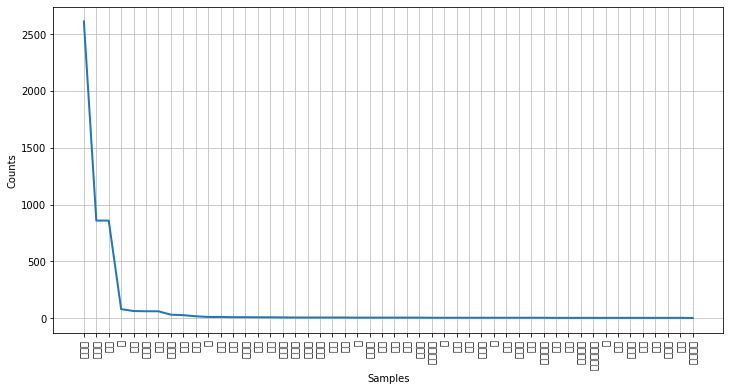

In [138]:
plt.figure(figsize=(12,6))
gifts.plot(50) 
plt.show()

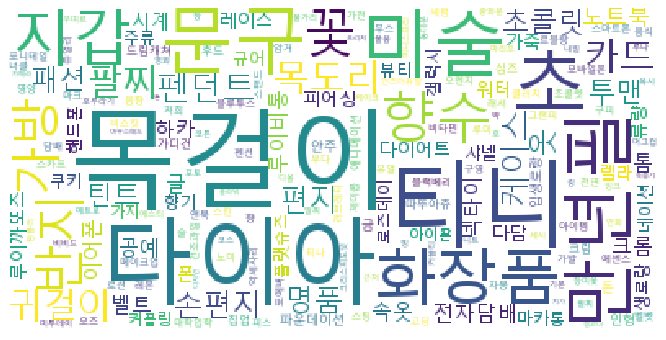

In [145]:
data = gifts.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [146]:
mask = np.array(Image.open('data/wc5.heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [147]:
data = gifts.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

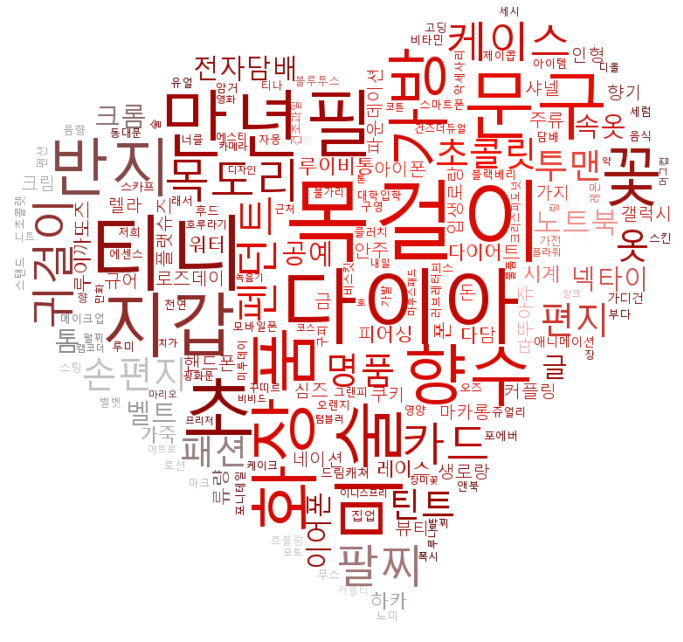

In [148]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()
